# Урок 5. Пермутационный тест, бутстрап анализ и метод максимального правдоподобия

## Домашнее задание  
Ранее мы выяснили, что размеры выборок в имеющихся данных малы.

Попробуйте протестировать несколько гипотез из предыдущих заданий с использованием материала, полученного на этом занятии. Изменились ли результаты?

Задание выполняется на языке R и предоставляется в формате Google Colab

### Загрузка библиотек и чтение файлов

In [ ]:
install.packages("tidyverse")
install.packages("readxl")
install.packages("writexl")
install.packages("ggplot2")
install.packages("gplots")
# install.packages("skimr")
install.packages("psych")
# install.packages("gridExtra")
# install.packages("moments")
# install.packages("fitdistrplus")
# install.packages("data.table")
install.packages("car")
# install.packages("rstatix")
# install.packages("emmeans")
# install.packages("ez")
# install.packages("MASS")
# install.packages("tidyr")

install.packages("simpleboot")
install.packages("coin")
install.packages("boot")
install.packages("jackknifeR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib

In [ ]:
library(tidyverse)
library(dplyr)
require(readxl)
library(writexl)
library(ggplot2)
library(gplots)
# library(skimr)
library(psych)
# library(gridExtra)
# library(moments)
library(car)
# library(fitdistrplus)
# library(rstatix)
# library(emmeans)
# library(ez)
# library(MASS)
# library(tidyr)

library(tibble)
library(dplyr)
library(simpleboot)
library(coin)
library(boot)
library(jackknifeR)

In [ ]:
data <- read_xlsx("/content/21_5_files/data.xlsx", sheet = 1) %>%
  rename_with(make.names)
data

New names:
• `Choi...25` -> `Choi...21`
• `Tgi...26` -> `Tgi...22`
• `HDLi...27` -> `HDLi...23`
• `LDLi...28` -> `LDLi...24`
• `Choi...29` -> `Choi...25`
• `Tgi...30` -> `Tgi...26`
• `HDLi...31` -> `HDLi...27`
• `LDLi...32` -> `LDLi...28`


Vial.number,Group,Age,Plasma.volume,Ht,Wt,BMI,Sys,Dia,PR,⋯,G1.LDLi,G2.LDLi,G3.LDLi,S0.LDLi,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,63,6.5,163,84.0,31.61579,125,76,67,⋯,4.090,68.910,3.570,3.980,28.180,42.460,1.950,0.020,1.67,13.02
2,0,47,5.5,179,111.0,34.64311,125,82,65,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,57,7.0,164,80.0,29.74420,132,80,92,⋯,5.160,68.220,3.110,4.640,30.430,39.860,1.560,0.020,1.69,14.16
4,1,72,5.0,160,58.8,22.96875,130,90,68,⋯,3.950,68.030,4.500,3.780,29.370,41.130,2.200,0.020,1.89,13.89
5,1,57,5.0,180,71.0,21.91358,135,75,70,⋯,4.630,66.910,4.030,4.440,28.540,40.640,1.950,0.020,2.03,14.25
6,1,79,6.2,160,64.0,25.00000,110,75,66,⋯,4.050,64.010,5.270,3.720,26.710,40.390,2.510,0.020,2.70,16.06
7,1,61,6.5,164,67.0,24.91077,124,82,84,⋯,4.100,65.990,4.700,4.030,28.440,39.990,2.330,0.020,1.61,13.82
8,1,70,5.5,162,61.0,23.24341,135,78,72,⋯,5.270,67.260,3.240,4.690,32.270,37.290,1.520,0.030,1.61,14.59
9,0,50,6.0,150,79.0,35.11111,142,95,88,⋯,3.970,67.590,4.220,4.420,27.990,41.190,2.180,0.050,1.55,13.26


In [ ]:
names(data)

[1] "Vial.number"      "Group"            "Age"             
  [4] "Plasma.volume"    "Ht"               "Wt"              
  [7] "BMI"              "Sys"              "Dia"             
 [10] "PR"               "Sm"               "Dm"              
 [13] "HT"               "LVH"              "IHD"             
 [16] "MI"               "Str"              "A_C"             
 [19] "A_H"              "A_D"              "Choi...21"       
 [22] "Tgi...22"         "HDLi...23"        "LDLi...24"       
 [25] "Choi...25"        "Tgi...26"         "HDLi...27"       
 [28] "LDLi...28"        "AI"               "r.lat.min"       
 [31] "r.ant.min"        "r.pos.min"        "l.lat.min"       
 [34] "l.ant.min"        "l.pos.min"        "r.lat.max"       
 [37] "r.ant.max"        "r.pos.max"        "l.lat.max"       
 [40] "l.ant.max"        "l.pos.max"        "carotid.IMT.mean"
 [43] "Plaque"           "Statins"          "GPHDL1"          
 [46] "GPHDL2"           "GPHDL3"           "GPHDL4"          
 [49] "GPHDL5"           "GPHDL6"           "GPHDL7"          
 [52] "GPHDL8"           "GPHDL9"           "GPHDL10"         
 [55] "GPHDL11"          "GPHDL12"          "GPHDL13"         
 [58] "GPHDL14"          "GPHDL15"          "GPHDL16"         
 [61] "GPHDL17"          "GPHDL18"          "GPHDL19"         
 [64] "GPHDL20"          "GPHDL21"          "GPHDL22"         
 [67] "sum_auc.HDLi"     "LB.HDLi"          "HB.HDLi"         
 [70] "G1.HDLi"          "G2.HDLi"          "G3.HDLi"         
 [73] "S0.HDLi"          "S1.HDLi"          "S2.HDLi"         
 [76] "S3.HDLi"          "B.HDLi"           "F.HDLi"          
 [79] "HM.HDLi"          "GPLDL1"           "GPLDL2"          
 [82] "GPLDL3"           "GPLDL4"           "GPLDL5"          
 [85] "GPLDL6"           "GPLDL7"           "GPLDL8"          
 [88] "GPLDL9"           "GPLDL10"          "GPLDL11"         
 [91] "GPLDL12"          "GPLDL13"          "GPLDL14"         
 [94] "GPLDL15"          "GPLDL16"          "GPLDL17"         
 [97] "GPLDL18"          "GPLDL19"          "GPLDL20"         
[100] "GPLDL21"          "GPLDL22"          "sum_auc.LDLi"    
[103] "LB.LDLi"          "HB.LDLi"          "G1.LDLi"         
[106] "G2.LDLi"          "G3.LDLi"          "S0.LDLi"         
[109] "S1.LDLi"          "S2.LDLi"          "S3.LDLi"         
[112] "B.LDLi"           "F.LDLi"           "HM.LDLi"

In [ ]:
# Создадим список колонок, которые мы переведем в Factor
factor_cols <- c("Vial.number", "Group", "Sm", "Dm", "HT", "LVH", "IHD", "MI", "Str", "A_C", "A_H", "A_D", "Plaque", "Statins")

In [ ]:
# Напишем функцию, которая переведет колонки в Factor и Numeric

convert_columns <- function(data, columns) {
  data <- mutate(data, across(all_of(columns), as.factor),
                        across(!all_of(columns), as.numeric))
  return(data)
}

In [ ]:
# Применим функцию к нашей объединённой таблице
data <- convert_columns(data, factor_cols)
data

Vial.number,Group,Age,Plasma.volume,Ht,Wt,BMI,Sys,Dia,PR,⋯,G1.LDLi,G2.LDLi,G3.LDLi,S0.LDLi,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,63,6.5,163,84.0,31.61579,125,76,67,⋯,4.090,68.910,3.570,3.980,28.180,42.460,1.950,0.020,1.67,13.02
2,0,47,5.5,179,111.0,34.64311,125,82,65,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,57,7.0,164,80.0,29.74420,132,80,92,⋯,5.160,68.220,3.110,4.640,30.430,39.860,1.560,0.020,1.69,14.16
4,1,72,5.0,160,58.8,22.96875,130,90,68,⋯,3.950,68.030,4.500,3.780,29.370,41.130,2.200,0.020,1.89,13.89
5,1,57,5.0,180,71.0,21.91358,135,75,70,⋯,4.630,66.910,4.030,4.440,28.540,40.640,1.950,0.020,2.03,14.25
6,1,79,6.2,160,64.0,25.00000,110,75,66,⋯,4.050,64.010,5.270,3.720,26.710,40.390,2.510,0.020,2.70,16.06
7,1,61,6.5,164,67.0,24.91077,124,82,84,⋯,4.100,65.990,4.700,4.030,28.440,39.990,2.330,0.020,1.61,13.82
8,1,70,5.5,162,61.0,23.24341,135,78,72,⋯,5.270,67.260,3.240,4.690,32.270,37.290,1.520,0.030,1.61,14.59
9,0,50,6.0,150,79.0,35.11111,142,95,88,⋯,3.970,67.590,4.220,4.420,27.990,41.190,2.180,0.050,1.55,13.26


### Задача 1
в домашнем задании к 3 уроку я не получил статистических подтверждений в пользу гипотезы о том, что пациенты принимающие статины имеют меньший показатель средней толщины комплекса интима-медиа сонных артерий (`carotid.IMT.mean`) по сравнению с теми, кто не принимает статины. Попробуем применить различные методы, чтобы увеличить выборку и повторно произвести тесты.  

**Гипотеза 3**  
Пациенты принимающие статины имеют меньший показатель средней толщины комплекса интима-медиа сонных артерий (`carotid.IMT.mean`) по сравнению с теми, кто не принимает статины.

    H0: Среднeе значениe толщины комплекса интима-медиа сонных артерий carotid.IMT.mean одинаковы для обеих групп (принимающих статины и не принимающих).
    H1: Среднeе значениe толщины комплекса интима-медиа сонных артерий carotid.IMT.mean различаются между группами.
    Тип выборок: Независимые выборки.
    НП: 'Statins'
    ЗП: 'carotid.IMT.mean'
    Предположения: Нормальное распределение средней толщины комплекса интима-медиа сонных артерий carotid.IMT.mean в каждой группе, равенство дисперсий между группами.

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


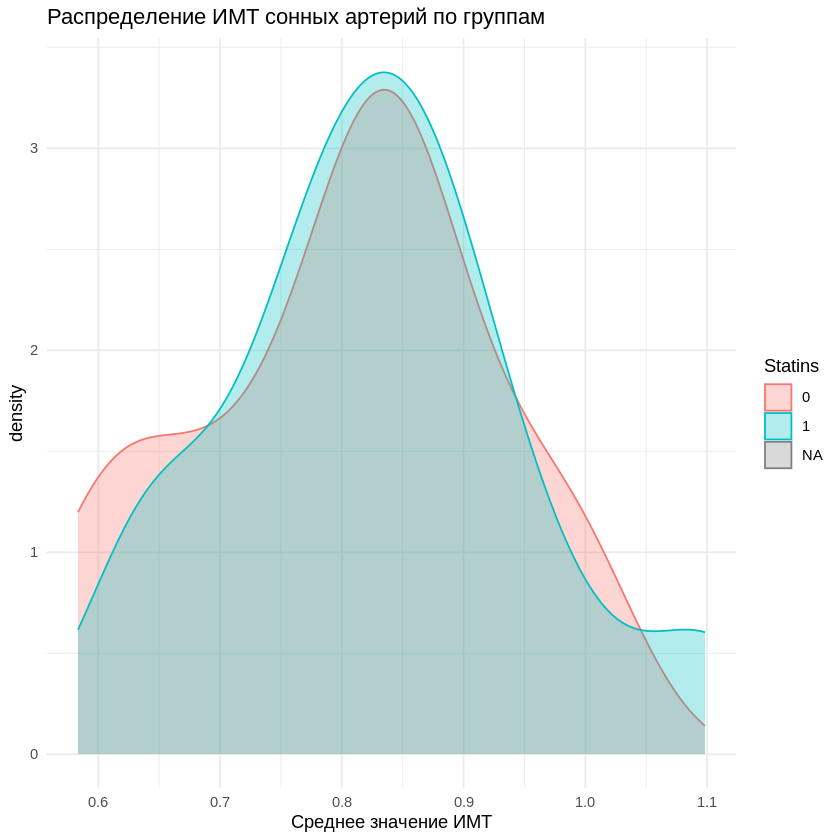

In [ ]:
ggplot(data, aes(x = carotid.IMT.mean, col = Statins, fill = Statins, group = Statins)) +
  geom_density(alpha=0.3) +
  labs(title = "Распределение ИМТ сонных артерий по группам", x = "Среднее значение ИМТ") +
  theme_minimal()


	Shapiro-Wilk normality test

data:  data$carotid.IMT.mean[data$Statins == 0]
W = 0.95432, p-value = 0.3351



	Shapiro-Wilk normality test

data:  data$carotid.IMT.mean[data$Statins == 1]
W = 0.96581, p-value = 0.8398


[1] "Levene test"


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.01881845,0.8916744
,35,NA,NA


null device 
          1

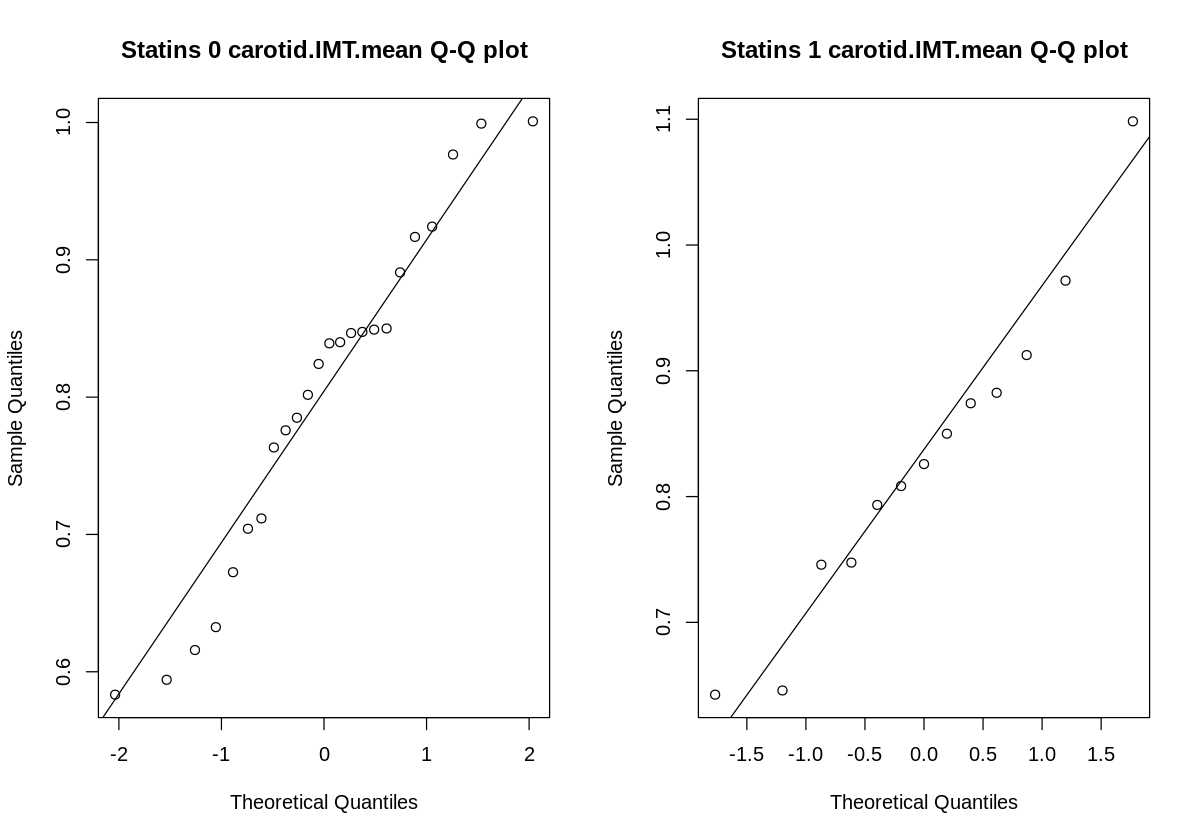

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 7)
par(mfrow = c(1,2))
qqnorm(data$carotid.IMT.mean[data$Statins == 0], main = "Statins 0 carotid.IMT.mean Q-Q plot")
qqline(rnorm(200, mean(data$carotid.IMT.mean[data$Statins == 0], na.rm = TRUE), sd = sd(data$carotid.IMT.mean[data$Statins == 0], na.rm = TRUE)))
qqnorm(data$carotid.IMT.mean[data$Statins == 1], main = "Statins 1 carotid.IMT.mean Q-Q plot")
qqline(rnorm(200, mean(data$carotid.IMT.mean[data$Statins == 1], na.rm = TRUE), sd = sd(data$carotid.IMT.mean[data$Statins == 1], na.rm = TRUE)))
shapiro.test(data$carotid.IMT.mean[data$Statins == 0])
shapiro.test(data$carotid.IMT.mean[data$Statins == 1])
print("Levene test")
leveneTest(carotid.IMT.mean ~ Statins, data, na.action = na.omi)
dev.off()

In [ ]:
data %>%
  t.test(carotid.IMT.mean ~ Statins, data = .)


	Welch Two Sample t-test

data:  carotid.IMT.mean by Statins
t = -0.67046, df = 24.322, p-value = 0.5089
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.11725527  0.05972322
sample estimates:
mean in group 0 mean in group 1 
       0.801875        0.830641 


Проведенный параметрический тест показывает отсутствие различий между группами.

#### Bootstap

Применим Bootstrap и оценим разницу средних, а также оценим медианы выборок.

In [ ]:
# # Функция для выполнения бутстрепа и преобразования данных
# bootstrap_and_prepare <- function(data, group, R = 1500) {
#   boot_result <- one.boot(data, mean, R = R)
#   tibble_result <- boot_result$t %>%
#     as_tibble(.name_repair = "unique") %>%
#     mutate(Statins = group) %>%
#     rename(means = V1)
#   return(tibble_result)
# }

In [ ]:
# # Выполнение бутстрепа для групп Statins == 0 и Statins == 1
# bootstrapped0 <- bootstrap_and_prepare(data$carotid.IMT.mean[data$Statins == 0], 0)
# bootstrapped1 <- bootstrap_and_prepare(data$carotid.IMT.mean[data$Statins == 1], 1)

# # Объединение результатов и преобразование переменной Statins в фактор
# boots_df <- bind_rows(bootstrapped0, bootstrapped1) %>%
#   mutate(Statins = as.factor(Statins))

# # Просмотр результата
# print(boots_df)

In [ ]:
bootstapped0 <- one.boot(data$carotid.IMT.mean[data$Statins == 0], na.rm = TRUE, mean, R = 1500)
bootstapped0 <- bootstapped0$t %>%
  as_tibble() %>%
  mutate(Statins = 0) %>%
  rename(means = V1)
bootstapped1 <- one.boot(data$carotid.IMT.mean[data$Statins == 1], na.rm = TRUE, mean, R = 1500)
bootstapped1 <- bootstapped1$t %>%
  as_tibble() %>%
  mutate(Statins = 1) %>%
  rename(means = V1)
boots_df <- rbind(bootstapped0, bootstapped1) %>%
  mutate(Statins = as.factor(Statins))

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


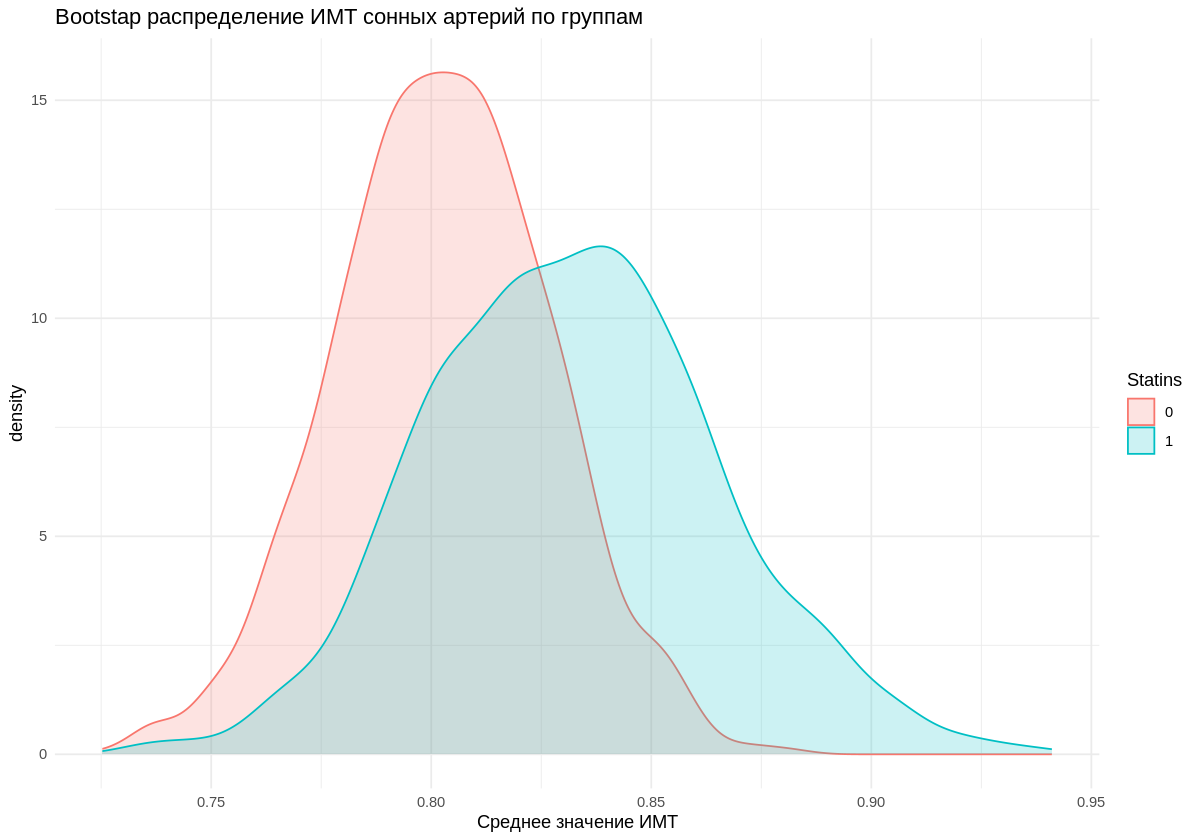

In [ ]:
ggplot(boots_df, aes(x = means, col = Statins, fill = Statins, group = Statins)) +
  geom_density(alpha = 0.2) +
  labs(title = "Bootstap распределение ИМТ сонных артерий по группам", x = "Среднее значение ИМТ") +
  theme_minimal()

In [ ]:
bootstrapped <- two.boot(data$carotid.IMT.mean[data$Statins == 0], data$carotid.IMT.mean[data$Statins == 1], na.rm = TRUE, mean, R = 1500)

In [ ]:
boots_mean_diff <- data.frame(bootstrapped$t)
colnames(boots_mean_diff) <- 'mean_diffs'

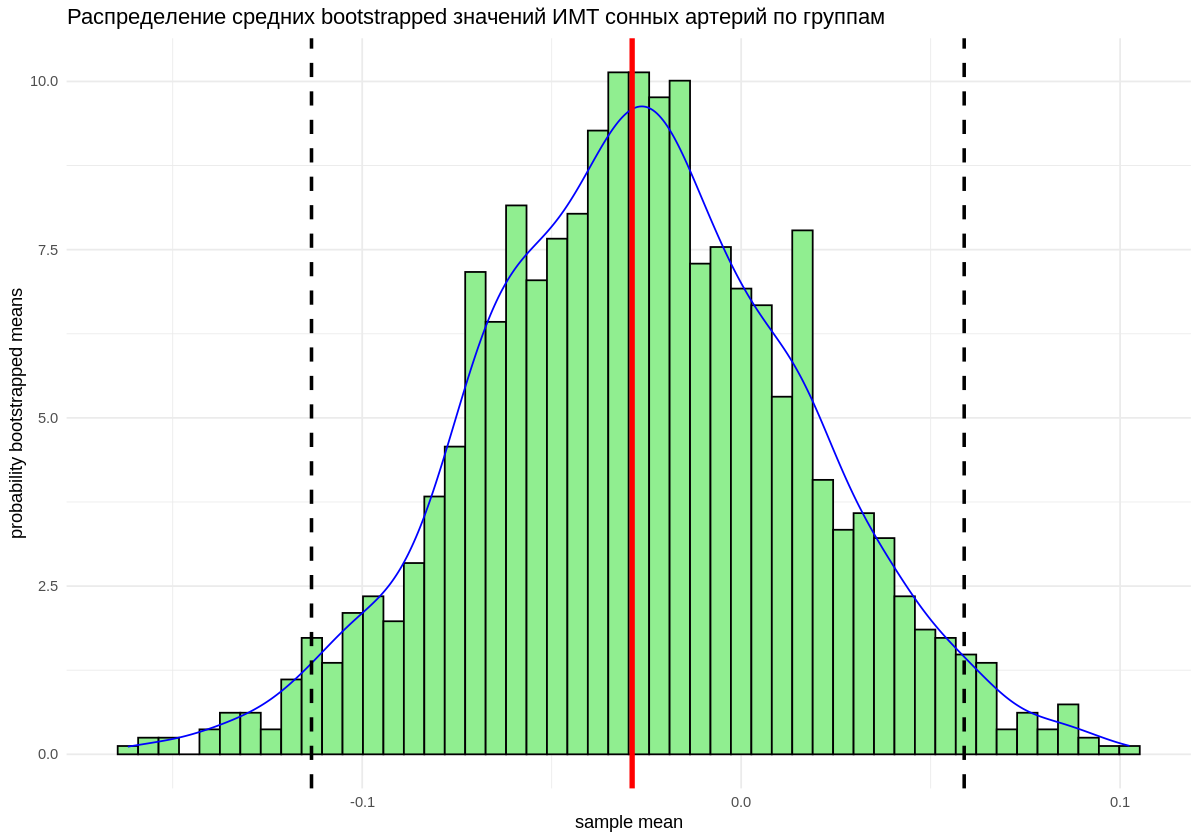

In [ ]:
ggplot(boots_mean_diff, aes(x=mean_diffs)) +
  geom_histogram(aes(y=after_stat(density)), bins = 50, color='black', fill = 'lightgreen') +
  geom_density(color = 'blue') +
  geom_vline(xintercept = bootstrapped$t0, linewidth = 1.5, colour = 'red') +
  geom_vline(xintercept = quantile(boots_mean_diff$mean_diffs, 0.025), linewidth = 1, linetype = 'dashed', colour = 'black') +
  geom_vline(xintercept = quantile(boots_mean_diff$mean_diffs, 0.975), linewidth = 1, linetype = 'dashed', colour = 'black') +
  xlab('sample mean') +
  ylab('probability bootstrapped means') +
  ggtitle("Распределение средних bootstrapped значений ИМТ сонных артерий по группам") +
  theme_minimal()

[1] -0.02876603

Warning message in boot.ci(bootstrapped):
“bootstrap variances needed for studentized intervals”


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1500 bootstrap replicates

CALL : 
boot.ci(boot.out = bootstrapped)

Intervals : 
Level      Normal              Basic         
95%   (-0.1151,  0.0538 )   (-0.1169,  0.0566 )  

Level     Percentile            BCa          
95%   (-0.1142,  0.0593 )   (-0.1159,  0.0566 )  
Calculations and Intervals on Original Scale

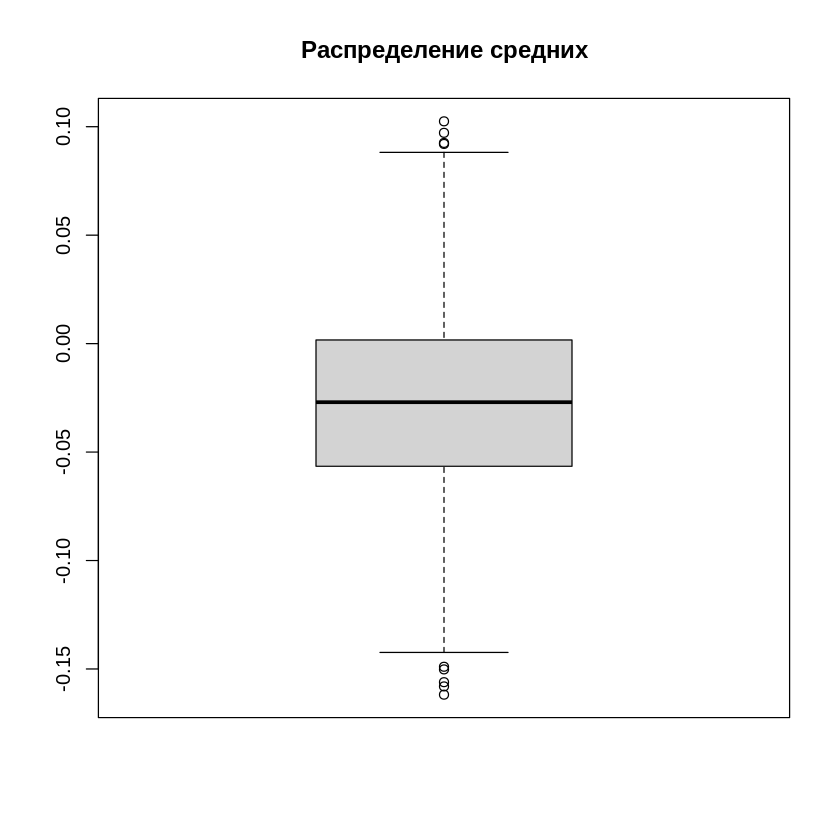

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

bootstrapped$t0
boot.ci(bootstrapped)
boxplot(boots_mean_diff, main = "Распределение средних")

In [ ]:
bootstrapped <- two.boot(data$carotid.IMT.mean[data$Statins == 0], data$carotid.IMT.mean[data$Statins == 1], na.rm = TRUE, median, R = 1500)

In [ ]:
boots_median_diff <- data.frame(bootstrapped$t)
colnames(boots_median_diff) <- 'median_diffs'

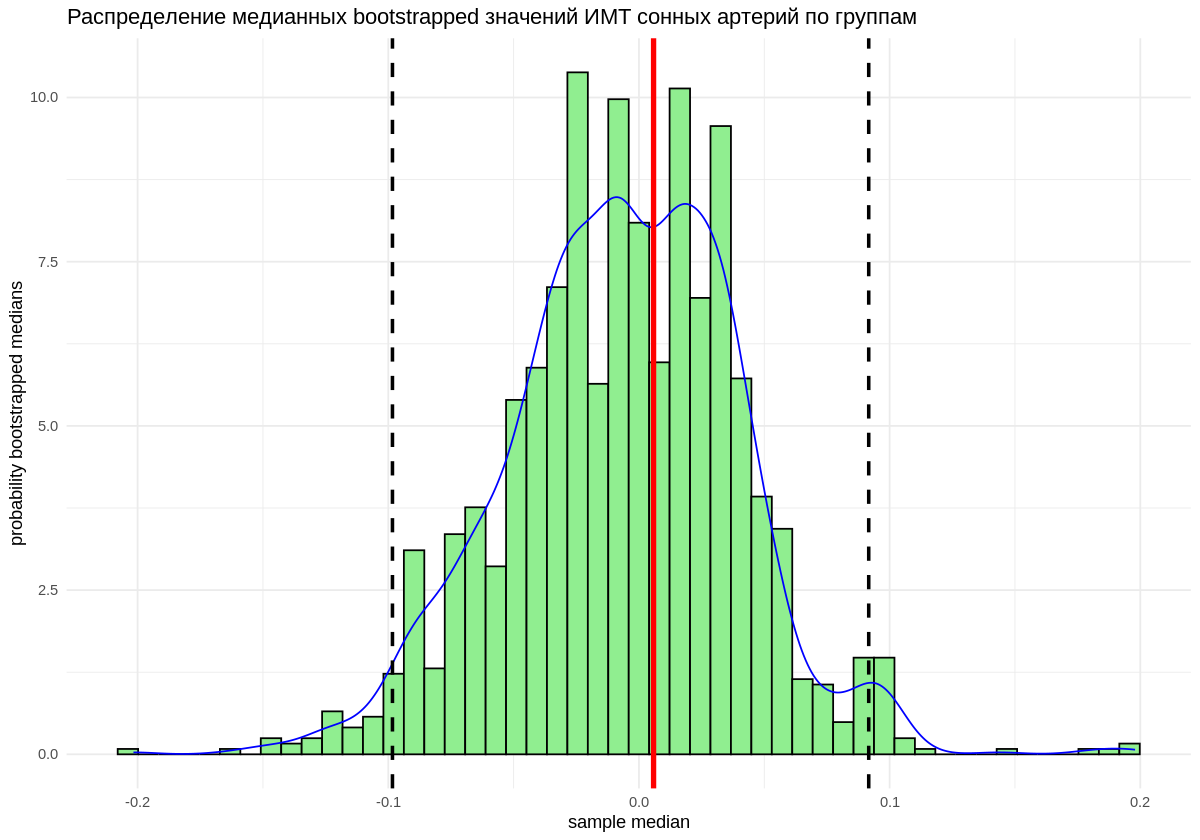

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 7)

ggplot(boots_median_diff, aes(x=median_diffs)) +
  geom_histogram(aes(y=after_stat(density)), bins = 50, color='black', fill = 'lightgreen') +
  geom_density(color = 'blue') +
  geom_vline(xintercept = bootstrapped$t0, linewidth = 1.5, colour = 'red') +
  geom_vline(xintercept = quantile(boots_median_diff$median_diffs, 0.025), linewidth = 1, linetype = 'dashed', colour = 'black') +
  geom_vline(xintercept = quantile(boots_median_diff$median_diffs, 0.975), linewidth = 1, linetype = 'dashed', colour = 'black') +
  xlab('sample median') +
  ylab('probability bootstrapped medians') +
  ggtitle("Распределение медианных bootstrapped значений ИМТ сонных артерий по группам") +
  theme_minimal()

[1] 0.005833333

Warning message in boot.ci(bootstrapped):
“bootstrap variances needed for studentized intervals”


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1500 bootstrap replicates

CALL : 
boot.ci(boot.out = bootstrapped)

Intervals : 
Level      Normal              Basic         
95%   (-0.0724,  0.1087 )   (-0.0800,  0.1100 )  

Level     Percentile            BCa          
95%   (-0.0983,  0.0917 )   (-0.0804,  0.1004 )  
Calculations and Intervals on Original Scale

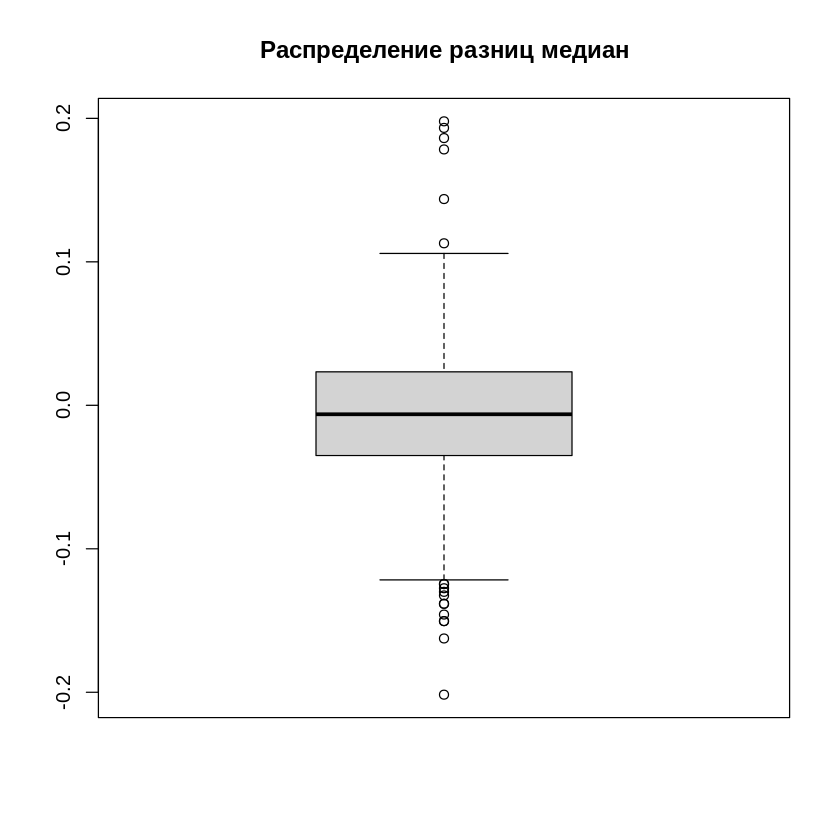

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

bootstrapped$t0
boot.ci(bootstrapped)
boxplot(boots_median_diff, main = "Распределение разниц медиан")

#### Permutation


In [ ]:
data %>%
  slice_sample(n = 100) %>%
  coin::normal_test(carotid.IMT.mean ~ Statins, data = ., na.rm = TRUE, conf.int = TRUE)


	Asymptotic Two-Sample van der Waerden (Normal Quantile) Test

data:  carotid.IMT.mean by Statins (0, 1)
Z = -0.66132, p-value = 0.5084
alternative hypothesis: true mu is not equal to 0
95 percent confidence interval:
 -0.11916667  0.05666666
sample estimates:
difference in location 
                 -0.03 


In [ ]:
oneway_test(carotid.IMT.mean ~ Statins, data, na.rm = TRUE, distribution=approximate(nresample = 5000))


	Approximative Two-Sample Fisher-Pitman Permutation Test

data:  carotid.IMT.mean by Statins (0, 1)
Z = -0.67958, p-value = 0.509
alternative hypothesis: true mu is not equal to 0


In [ ]:
summary(aov(carotid.IMT.mean ~ Statins, data))

            Df Sum Sq  Mean Sq F value Pr(>F)
Statins      1 0.0070 0.006978   0.455  0.504
Residuals   35 0.5369 0.015341               
1 observation deleted due to missingness

In [ ]:
permut_df <- data %>%
  dplyr::select(carotid.IMT.mean, Statins) %>%
  drop_na()

In [ ]:
# Разница средних
mean_diffs <- permut_df %>%
  mutate(ln_imt = log(carotid.IMT.mean)) %>%
  drop_na(ln_imt) %>%
  group_by(Statins) %>%
  summarize(mean_imt = mean(carotid.IMT.mean), meanln_imt = mean(ln_imt)) %>%
  reframe(diff_imt = diff(mean_imt), diffln_imt = diff(meanln_imt))

In [ ]:
reps <- 1000
permdiffs <- numeric(reps)

In [ ]:
for (i in 1:reps) {
  onediff <- data %>%
    mutate(perm_statins = sample(Statins)) %>%
    group_by(perm_statins) %>%
    reframe(mean_IMT = mean(carotid.IMT.mean)) %>%
    reframe(diff_mean_IMT = diff(mean_IMT)) %>%
    pull(diff_mean_IMT)

  permdiffs <- c(permdiffs, onediff)
}

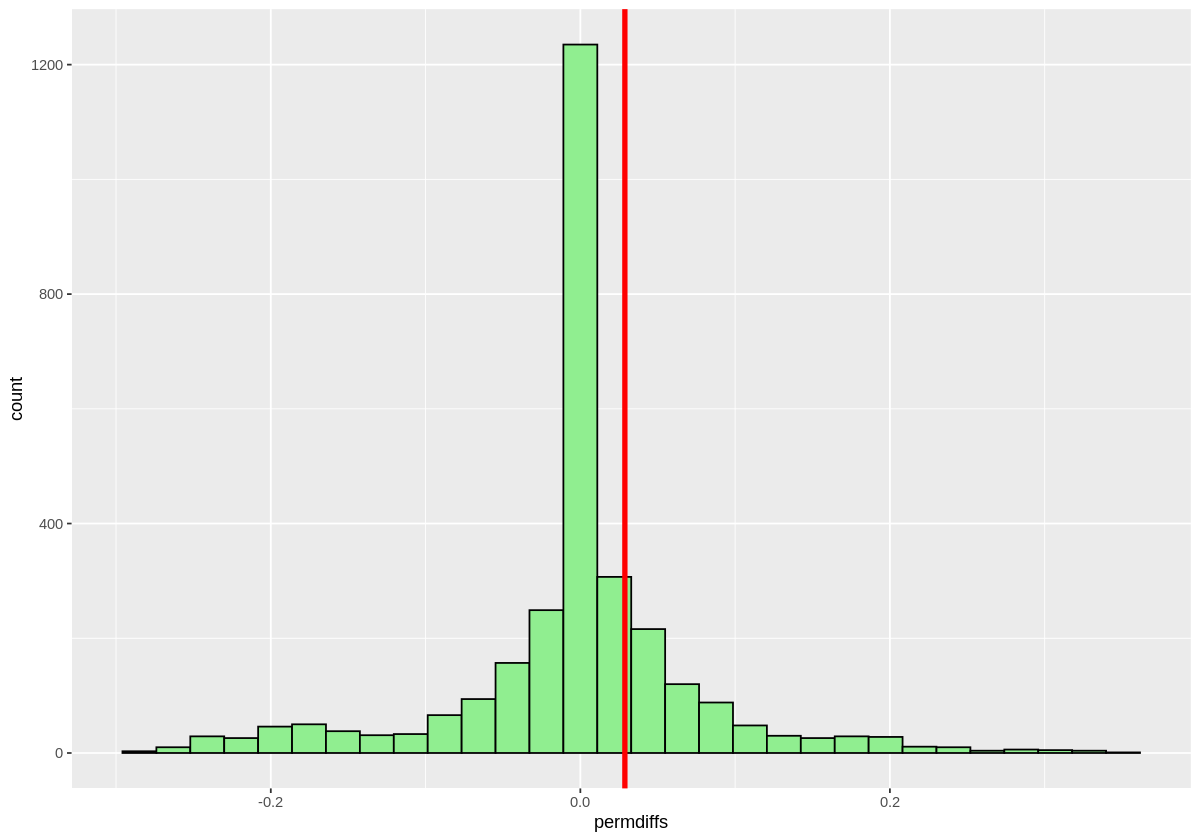

In [ ]:
# График распределения пермутационных различий в средних значениях
data.frame(permdiffs) %>%
  ggplot(aes(x = permdiffs)) +
  geom_histogram(bins = 30, color='black', fill = 'lightgreen') +
  geom_vline(xintercept = mean_diffs$diff_imt, linewidth = 1.5, color = "red")

In [ ]:
# Соотношение дисперсий
var_ratio <- data %>%
  group_by(Statins) %>%
  summarize(var_IMT = var(carotid.IMT.mean)) %>%
  reframe(IMT_ratio = var_IMT[1] / var_IMT[2])

In [ ]:
permvars <- numeric(reps)

In [ ]:
for (i in 1:reps) {
  oneratio <- data %>%
    mutate(perm_statins = sample(Statins)) %>%
    group_by(perm_statins) %>%
    summarize(var_IMT = var(carotid.IMT.mean)) %>%
    reframe(var_IMT[1] / var_IMT[2]) %>% pull()

  permvars[i] <- oneratio
}

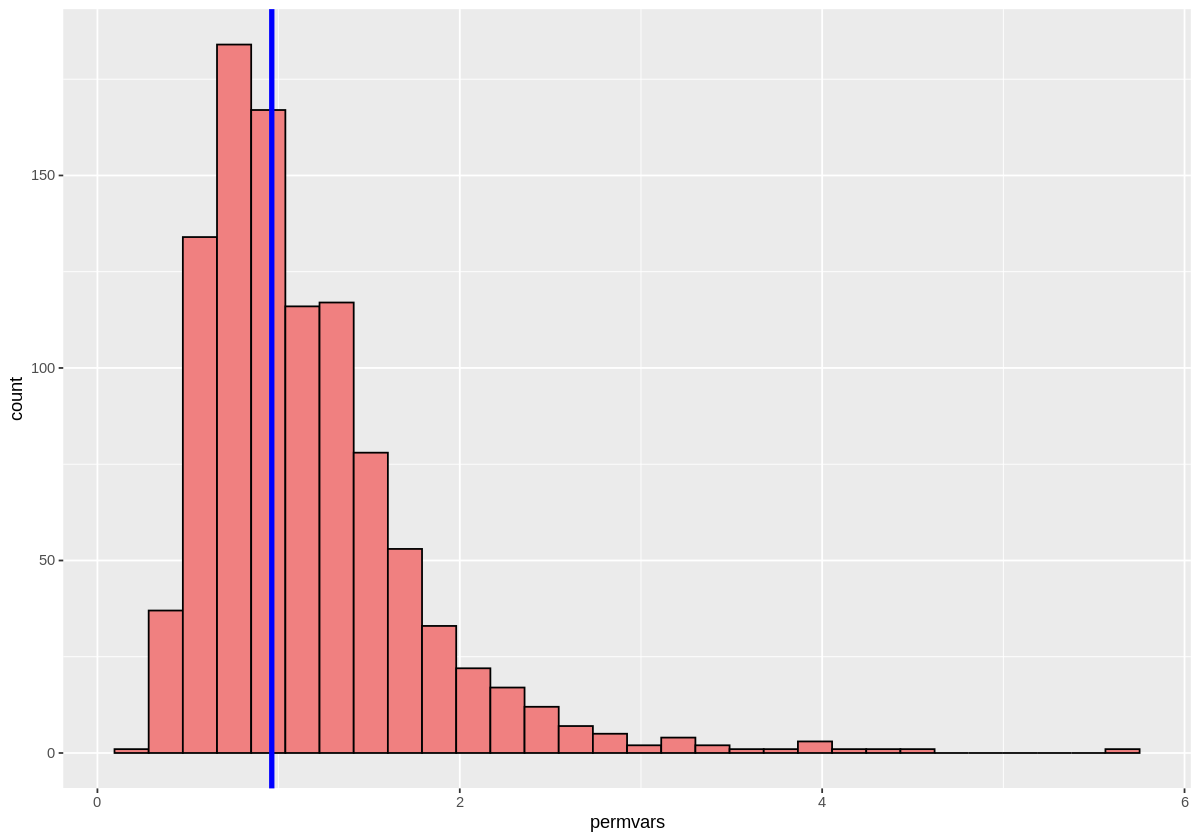

In [ ]:
# График распределения пермутационных соотношений дисперсий
permvars %>% data.frame() %>%
  ggplot(aes(x = permvars)) +
  geom_histogram(bins = 30, color='black', fill = 'lightcoral') +
  geom_vline(xintercept = var_ratio$IMT_ratio, linewidth = 1.5, color = "blue")

In [ ]:
# Интерпретация

# Односторонний пермутационный тест для разницы средних
p_value_means <- (sum(mean_diffs$diff_imt >= permdiffs) + 1) / (reps + 1)
print(p_value_means)

[1] 2.317682


In [ ]:
# Односторонний пермутационный тест для соотношения дисперсий
p_value_vars <- (sum(permvars <= var_ratio$IMT_ratio) + 1) / (reps + 1)
print(p_value_vars)

[1] 0.4635365


Применение методов Bootstrap и Permutation не позволило обнаружить статистически значимые различия в среднем значении ИМТ сонных артерий между группами пациентов принимающих и не принимающих статины.

### Задача 2
**Гипотеза**  
Пациенты с меньшим весом имеют меньший показатель средней толщины комплекса интима-медиа сонных артерий (`carotid.IMT.mean`).

    H0: Среднeе значениe толщины комплекса интима-медиа сонных артерий carotid.IMT.mean не зависит от веса пациента.
    H1: Среднeе значениe толщины комплекса интима-медиа сонных артерий carotid.IMT.mean зависит от веса пациента.
    Тип выборок: Независимые выборки.
    НП: 'Wt' - Вес пациента
    ЗП: 'carotid.IMT.mean' - Среднeе значениe толщины комплекса интима-медиа сонных артерий

In [ ]:
corr_result <- corr.test(data$Wt, data$carotid.IMT.mean, method = "pearson")

In [ ]:
print(corr_result, short=FALSE)

Call:corr.test(x = data$Wt, y = data$carotid.IMT.mean, method = "pearson")
Correlation matrix 
[1] 0.09
Sample Size 
[1] 38
These are the unadjusted probability values.
  The probability values  adjusted for multiple tests are in the p.adj object. 
[1] 0.58

 Confidence intervals based upon normal theory.  To get bootstrapped values, try cor.ci
      raw.lower raw.r raw.upper raw.p lower.adj upper.adj
NA-NA     -0.23  0.09       0.4  0.58     -0.23       0.4


#### Jackknife

In [ ]:
jack_df <- data %>%
  dplyr::select(c(Wt, carotid.IMT.mean))

In [ ]:
j.cor <- jackknife.cor(jack_df, d=1) #d - количество удаляемых элементов в каждом тесте
summary(j.cor)


Call: jackknife.cor(data = jack_df, d = 1)

Confidence Level: 0.95

d: 1

Jackknife Summary:
    carotid.IMT.mean  carotid.IMT.mean.1      se  carotid.IMT.mean.2
Wt           0.09803           -0.004775  0.1594              0.6149
    carotid.IMT.mean.3  carotid.IMT.mean.4
Wt              -0.225              0.4211

Estimate from Original Sample:
    carotid.IMT.mean
Wt  0.09326         


In [ ]:
jack_result <- as_tibble(j.cor$Jackknife.samples.est)

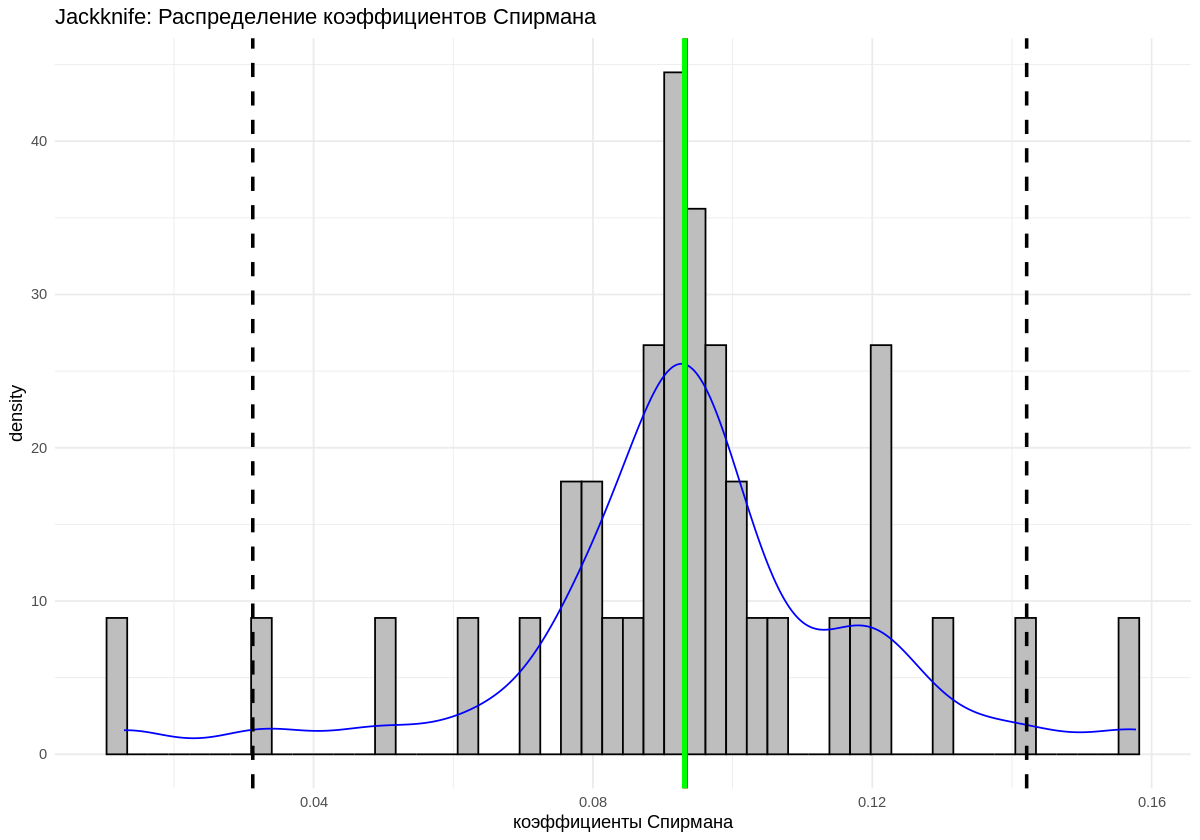

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 7)

ggplot(jack_result, aes(x=carotid.IMT.mean)) +
  geom_histogram(aes(y=after_stat(density)), bins = 50, color='black', fill = 'grey') +
  geom_density(color = 'blue') +
  geom_vline(xintercept = median(jack_result$carotid.IMT.mean), linewidth = 1.5, colour = 'red') +
  geom_vline(xintercept = mean(jack_result$carotid.IMT.mean), linewidth = 1.5, colour = 'green') +
  geom_vline(xintercept = quantile(jack_result$carotid.IMT.mean, 0.025), linewidth = 1, linetype = 'dashed', colour = 'black') +
  geom_vline(xintercept = quantile(jack_result$carotid.IMT.mean, 0.975), linewidth = 1, linetype = 'dashed', colour = 'black') +
  xlab('коэффициенты Спирмана') +
  ggtitle("Jackknife: Распределение коэффициентов Спирмана") +
  theme_minimal()

In [ ]:
spearman_test(carotid.IMT.mean ~ Wt, data, distribution = approximate(nresample = 9999))


	Approximative Spearman Correlation Test

data:  carotid.IMT.mean by Wt
Z = 0.11884, p-value = 0.9052
alternative hypothesis: true rho is not equal to 0


Применение методики `Jackknife` не выявило связи между весом и средней толщиной комплекса интима-медиа сонных артерий.

---
$^*$Дополнительные методы из вебинара